In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

import string
import re
import textblob
from textblob import TextBlob
import os

from wordcloud import WordCloud, STOPWORDS
from wordcloud import ImageColorGenerator
import warnings
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import files

uploaded = files.upload()


Saving socialmediadisaster.csv to socialmediadisaster.csv


In [ ]:
import pandas as pd

# Assuming the uploaded file is 'Tweets.csv'
df = pd.read_csv('socialmediadisaster.csv', encoding='latin1')



In [ ]:
df.head(5)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,choose_one,choose_one:confidence,choose_one_gold,keyword,location,text,tweetid,userid
0,778243823,True,golden,156,NaN,Relevant,1.0000,Relevant,NaN,NaN,Just happened a terrible car crash,1.0,NaN
1,778243824,True,golden,152,NaN,Relevant,1.0000,Relevant,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,13.0,NaN
2,778243825,True,golden,137,NaN,Relevant,1.0000,Relevant,NaN,NaN,"Heard about #earthquake is different cities, s...",14.0,NaN
3,778243826,True,golden,136,NaN,Relevant,0.9603,Relevant,NaN,NaN,"there is a forest fire at spot pond, geese are...",15.0,NaN
4,778243827,True,golden,138,NaN,Relevant,1.0000,Relevant,NaN,NaN,Forest fire near La Ronge Sask. Canada,16.0,NaN


In [ ]:
df.to_csv()

',_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,choose_one,choose_one:confidence,choose_one_gold,keyword,location,text,tweetid,userid\n0,778243823,True,golden,156,,Relevant,1.0,Relevant,,,Just happened a terrible car crash,1.0,\n1,778243824,True,golden,152,,Relevant,1.0,Relevant,,,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,13.0,\n2,778243825,True,golden,137,,Relevant,1.0,Relevant,,,"Heard about #earthquake is different cities, stay safe everyone.",14.0,\n3,778243826,True,golden,136,,Relevant,0.9603,Relevant,,,"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all",15.0,\n4,778243827,True,golden,138,,Relevant,1.0,Relevant,,,Forest fire near La Ronge Sask. Canada,16.0,\n5,778243828,True,golden,140,,Relevant,1.0,Relevant,,,All residents asked to \'shelter in place\' are being notified by officers. No other evacuation or shelter in place orders are expected,17.0,\n6,778243831,True,golden,142,,Relevant

In [ ]:
df.shape

(10876, 13)

In [ ]:
df.head

<bound method NDFrame.head of         _unit_id  _golden _unit_state  _trusted_judgments _last_judgment_at  \
0      778243823     True      golden                 156               NaN   
1      778243824     True      golden                 152               NaN   
2      778243825     True      golden                 137               NaN   
3      778243826     True      golden                 136               NaN   
4      778243827     True      golden                 138               NaN   
...          ...      ...         ...                 ...               ...   
10871  778261105     True      golden                 100               NaN   
10872  778261106     True      golden                  90               NaN   
10873  778261107     True      golden                 102               NaN   
10874  778261108     True      golden                  96               NaN   
10875  778261109     True      golden                  97               NaN   

      choose_one  cho

In [ ]:
df.info

<bound method DataFrame.info of         _unit_id  _golden _unit_state  _trusted_judgments _last_judgment_at  \
0      778243823     True      golden                 156               NaN   
1      778243824     True      golden                 152               NaN   
2      778243825     True      golden                 137               NaN   
3      778243826     True      golden                 136               NaN   
4      778243827     True      golden                 138               NaN   
...          ...      ...         ...                 ...               ...   
10871  778261105     True      golden                 100               NaN   
10872  778261106     True      golden                  90               NaN   
10873  778261107     True      golden                 102               NaN   
10874  778261108     True      golden                  96               NaN   
10875  778261109     True      golden                  97               NaN   

      choose_one  c

In [ ]:
df.value_counts()

Series([], dtype: int64)

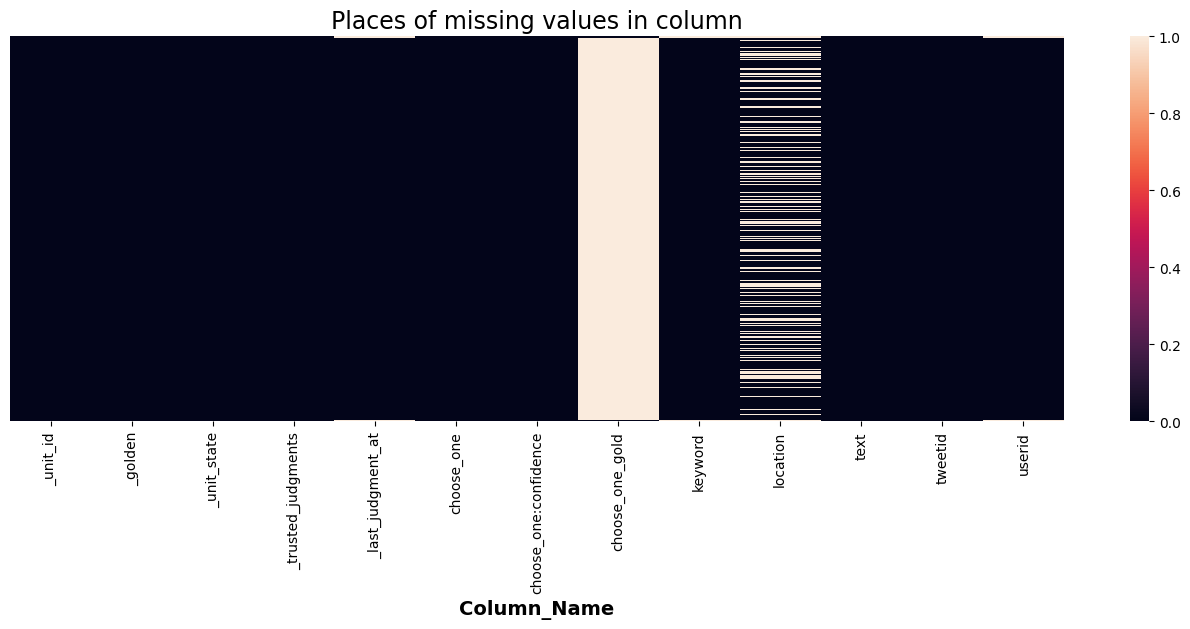

In [ ]:
#Heat Map for missing Values
plt.figure(figsize=(17, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",size=17)
plt.show()

In [ ]:
import plotly.graph_objects as go
Top_Location_Of_tweet= df['_trusted_judgments'].value_counts().head (10)

In [ ]:
print(Top_Location_Of_tweet)

5      9833
6       698
7       217
8        41
99        8
147       5
102       5
96        5
136       4
143       4
Name: _trusted_judgments, dtype: int64


In [ ]:
from nltk. corpus import stopwords
stop = stopwords.words('english')
df['text'].apply(lambda x: [item for item in x if item not in stop])
df.shape

(10876, 13)

In [ ]:
!pip install tweet-preprocessor

In [ ]:
#Remove unnecessary characters
punct  =  ['%','/',':','\\','&amp','&',';','?']

def remove_punctuations(text):
  for punctuation in punct:
    text = text.replace(punctuation,'')
  return text

In [ ]:
df['text'] = df['text'].apply(lambda x: remove_punctuations(x))

In [ ]:
#Drop tweets that has empty text fields
df['text'].replace( '', np.nan, inplace=True)
df.dropna(subset=["text"],inplace=True)
len(df)

10876

In [ ]:
df = df.reset_index(drop=True)
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,choose_one,choose_one:confidence,choose_one_gold,keyword,location,text,tweetid,userid
0,778243823,True,golden,156,NaN,Relevant,1.0000,Relevant,NaN,NaN,Just happened a terrible car crash,1.0,NaN
1,778243824,True,golden,152,NaN,Relevant,1.0000,Relevant,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,13.0,NaN
2,778243825,True,golden,137,NaN,Relevant,1.0000,Relevant,NaN,NaN,"Heard about #earthquake is different cities, s...",14.0,NaN
3,778243826,True,golden,136,NaN,Relevant,0.9603,Relevant,NaN,NaN,"there is a forest fire at spot pond, geese are...",15.0,NaN
4,778243827,True,golden,138,NaN,Relevant,1.0000,Relevant,NaN,NaN,Forest fire near La Ronge Sask. Canada,16.0,NaN


In [ ]:
from sklearn.feature_extraction. text import TfidfVectorizer, CountVectorizer

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['america', 'boston', 'california', 'customer', 'diego', 'francisco', 'new', 'oakland', 'san', 'virgin', 'york'] not in stop_words.
  warnings.warn(
<ipython-input-35-5fb2462e3f93>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_pos,y= counts, palette='husl')


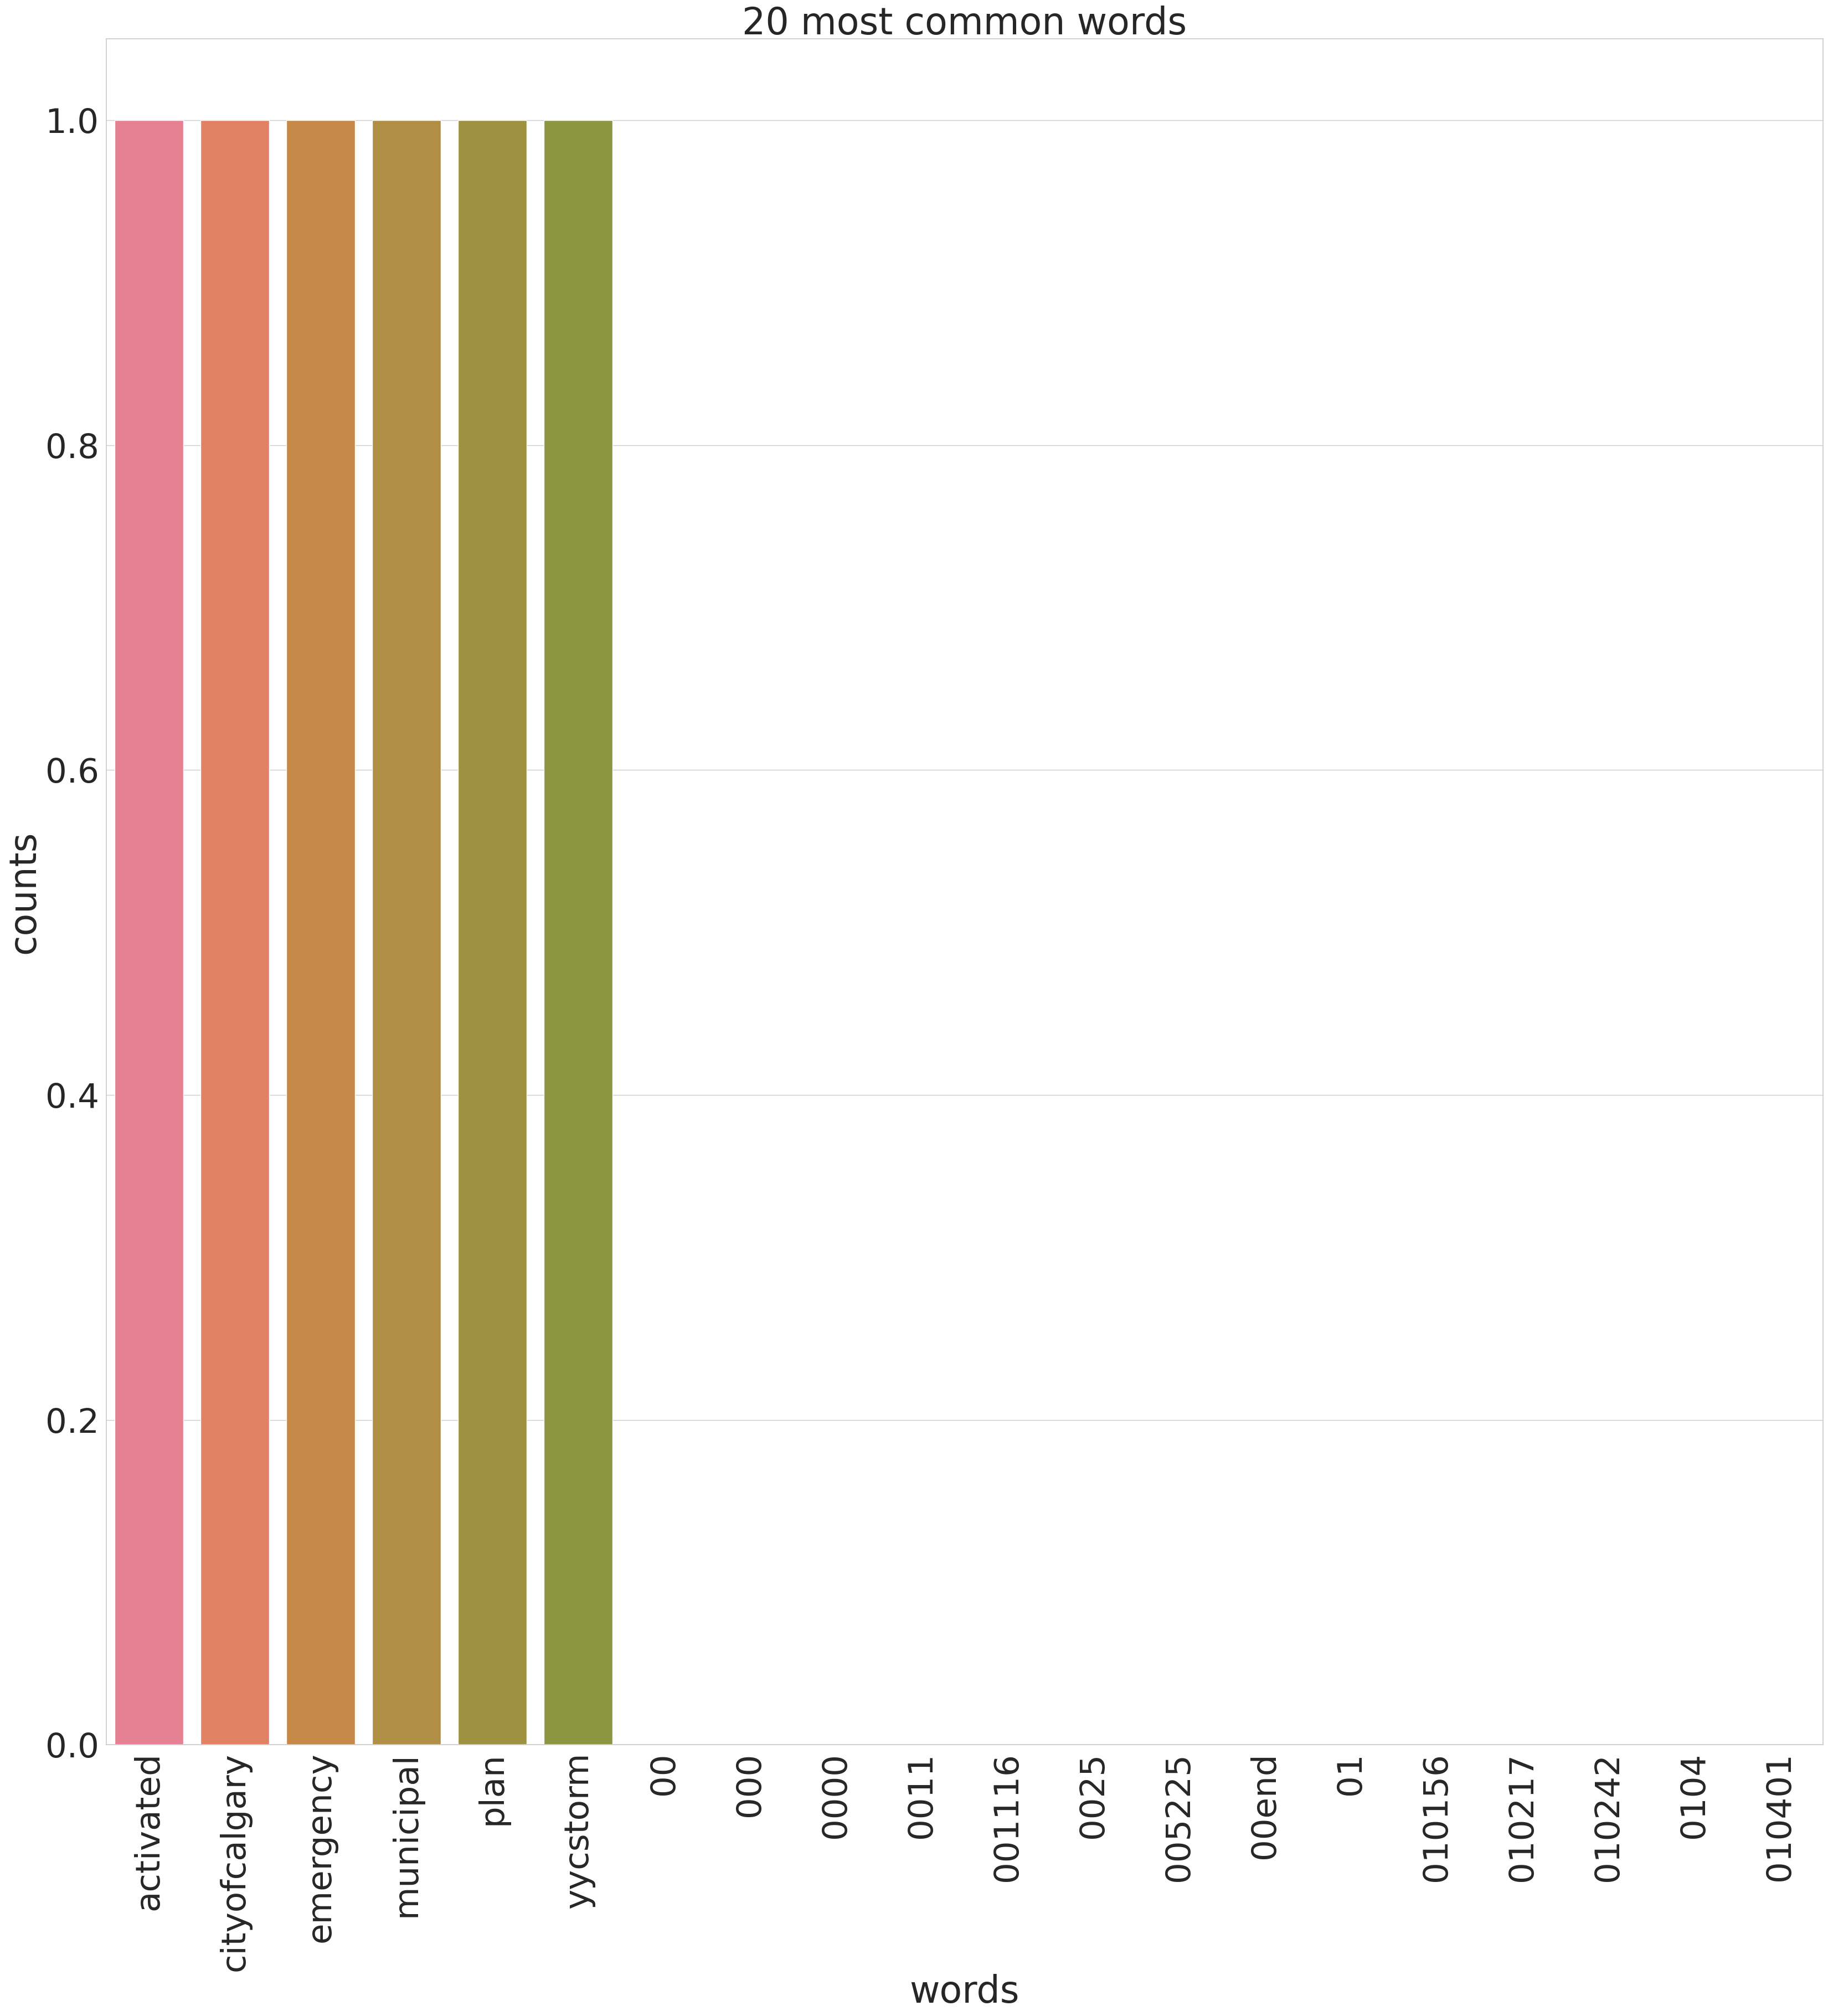

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.set_style('whitegrid')
%matplotlib inline
stop=stop+['Virgin America' , 'San Francisco' , 'Boston' , 'New York', ' customer' ,'flight' , 'airline', 'San Diego' , 'Oakland' , 'California']
def plot_20_most_common_words(count_data, count_vectorizer) :
  import matplotlib. pyplot as plt
  words = count_vectorizer.get_feature_names_out()
  total_counts = np. zeros(len(words))
  for t in count_data:
    total_counts = t.toarray()[0]

  count_dict = (zip(words, total_counts))
  count_dict = sorted(count_dict, key=lambda x:x[1],reverse=True)[0:20]
  words = [w[0] for w in count_dict]
  counts = [w[1] for w in count_dict]
  x_pos = np.arange(len(words))

  plt.figure(2, (40,40))
  plt.subplot(title = '20 most common words')
  sns. set_context('notebook',font_scale=4,rc={ 'lines.linewidth' :2.5})
  sns.barplot(x=x_pos,y= counts, palette='husl')
  plt.xticks(x_pos, words, rotation=90)
  plt.xlabel('words')
  plt.ylabel('counts')
  plt.show()

count_vectorizer = CountVectorizer(stop_words=stop)
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df['text'])
# print(count_vectorizer)
# print(count_data)
# Visualise the 20 most common words
plot_20_most_common_words(count_data,count_vectorizer)
plt.savefig('saved_figure.png')

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['america', 'boston', 'california', 'diego', 'francisco', 'new', 'oakland', 'san', 'virgin', 'york'] not in stop_words.
  warnings.warn(
<ipython-input-36-8d8b43bb201e>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_pos, y=counts, palette='husl')


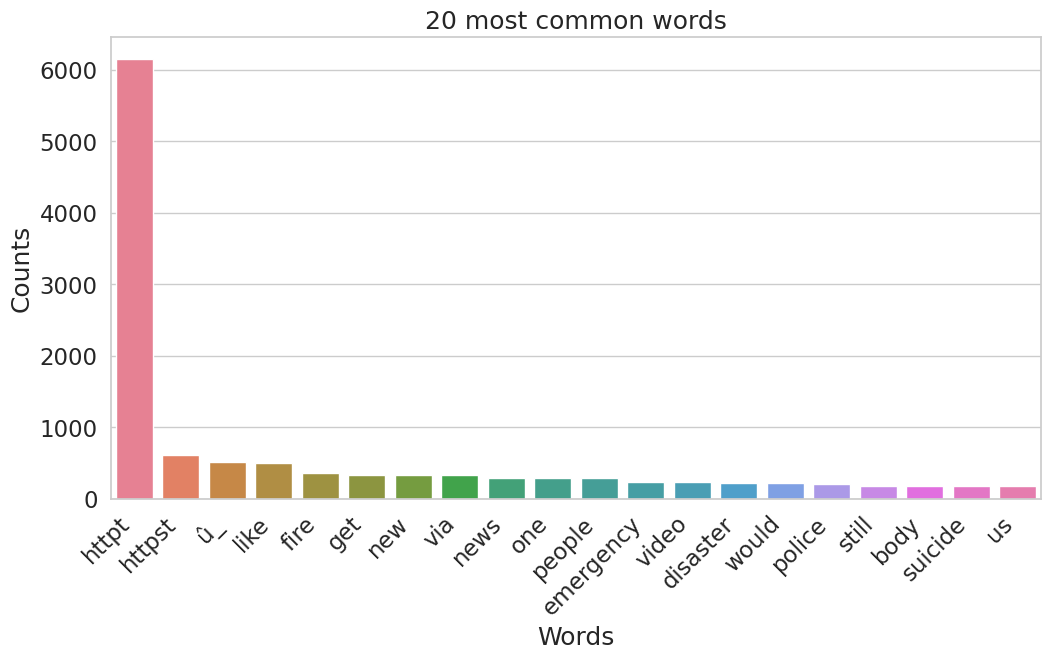

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

sns.set_style('whitegrid')
%matplotlib inline

stop = stop + ['Virgin America', 'San Francisco', 'Boston', 'New York', 'customer', 'flight', 'airline', 'San Diego', 'Oakland', 'California']

def plot_20_most_common_words(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names_out()
    total_counts = np.zeros(len(words))

    for t in count_data:
        total_counts += t.toarray()[0]

    count_dict = dict(zip(words, total_counts))
    count_dict = sorted(count_dict.items(), key=lambda x: x[1], reverse=True)[:20]

    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]

    x_pos = np.arange(len(words))

    plt.figure(figsize=(12, 6))
    sns.set_context('notebook', font_scale=1.5)
    sns.barplot(x=x_pos, y=counts, palette='husl')
    plt.title('20 most common words')
    plt.xticks(x_pos, words, rotation=45, ha='right')
    plt.xlabel('Words')
    plt.ylabel('Counts')
    plt.show()


count_vectorizer = CountVectorizer(stop_words=stop)
count_data = count_vectorizer.fit_transform(df['text'])

# Visualize the 20 most common words
plot_20_most_common_words(count_data, count_vectorizer)


<Axes: title={'center': 'Top 8 bigrams'}, ylabel='ngram'>

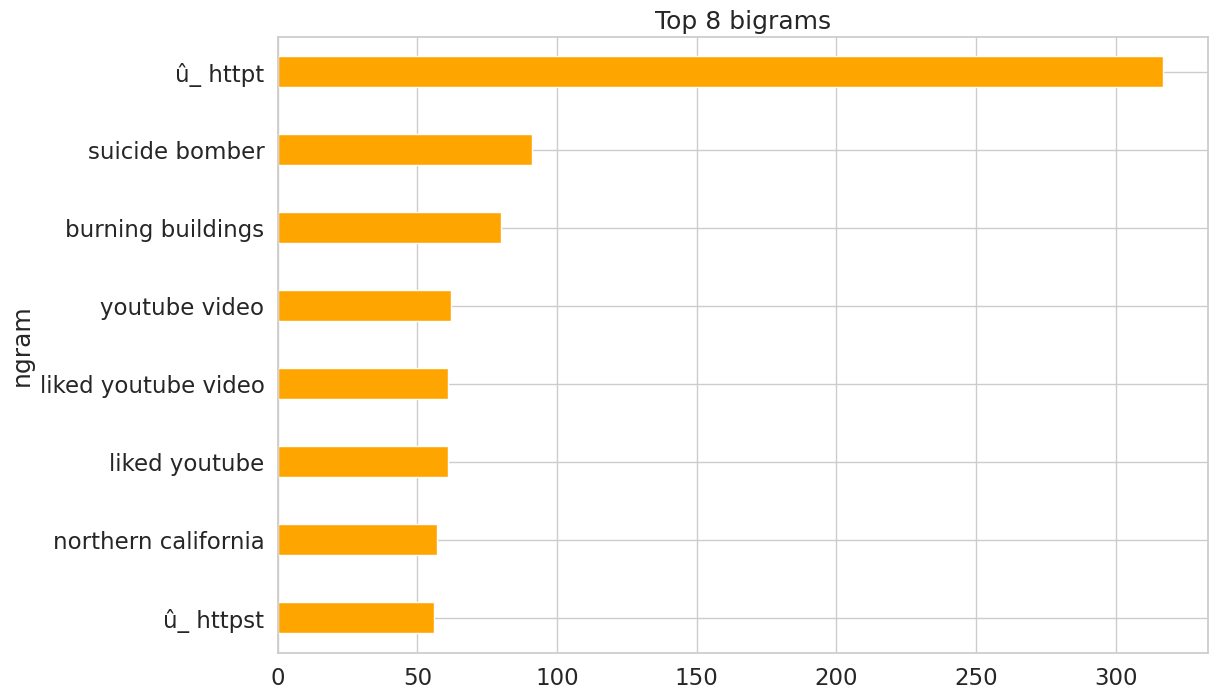

In [ ]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

def get_top_n_bigram(corpus, n=None) :
  vec = CountVectorizer(ngram_range=(2, 4), stop_words="english").fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0)
  words_freq =[(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:n]

common_words = get_top_n_bigram(df['text'] , 8)
mydict={}
for word, freq in common_words:
  bigram_df = pd.DataFrame(common_words,columns = ['ngram', 'count'])

bigram_df.groupby( 'ngram' ).sum()['count'].sort_values(ascending=False).sort_values().plot.barh(title = 'Top 8 bigrams',color='orange' , width=.4, figsize=(12,8),stacked = True)

In [ ]:
def get_subjectivity(text):
  return TextBlob(text).sentiment.subjectivity
def get_polarity(text):
  return TextBlob(text).sentiment.polarity

In [ ]:
df['subjectivity']=df['text'].apply(get_subjectivity)
df[ 'polarity' ]=df[ 'text'].apply(get_polarity)
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,choose_one,choose_one:confidence,choose_one_gold,keyword,location,text,tweetid,userid,subjectivity,polarity
0,778243823,True,golden,156,NaN,Relevant,1.0000,Relevant,NaN,NaN,Just happened a terrible car crash,1.0,NaN,1.00,-1.00
1,778243824,True,golden,152,NaN,Relevant,1.0000,Relevant,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,13.0,NaN,0.00,0.00
2,778243825,True,golden,137,NaN,Relevant,1.0000,Relevant,NaN,NaN,"Heard about #earthquake is different cities, s...",14.0,NaN,0.55,0.25
3,778243826,True,golden,136,NaN,Relevant,0.9603,Relevant,NaN,NaN,"there is a forest fire at spot pond, geese are...",15.0,NaN,0.00,0.00
4,778243827,True,golden,138,NaN,Relevant,1.0000,Relevant,NaN,NaN,Forest fire near La Ronge Sask. Canada,16.0,NaN,0.40,0.10


**5. Sentiment Analysis**

In [ ]:
df['textblob_score'] =df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [ ]:
neutral_threshold=0.05

In [ ]:

df['textblob_sentiment']=df[ 'textblob_score'].apply(lambda c:'positive' if c >= neutral_threshold else ('Negative' if c <= -(neutral_threshold) else 'Neutral' ) )

In [ ]:
textblob_df =  df[['text','textblob_sentiment','choose_one_gold']]
textblob_df

,text,textblob_sentiment,choose_one_gold
0,Just happened a terrible car crash,Negative,Relevant
1,Our Deeds are the Reason of this #earthquake M...,Neutral,Relevant
2,"Heard about #earthquake is different cities, s...",positive,Relevant
3,"there is a forest fire at spot pond, geese are...",Neutral,Relevant
4,Forest fire near La Ronge Sask. Canada,positive,Relevant
...,...,...,...
10871,M1.94 [0104 UTC]5km S of Volcano Hawaii. httpt...,Neutral,Relevant
10872,Police investigating after an e-bike collided ...,Negative,Relevant
10873,The Latest More Homes Razed by Northern Califo...,positive,Relevant
10874,MEG issues Hazardous Weather Outlook (HWO) htt...,positive,Relevant


In [ ]:
textblob_df["textblob_sentiment"].value_counts()

Neutral     6091
positive    5210
Negative    3339
Name: textblob_sentiment, dtype: int64

<Axes: title={'center': 'Sentiment Analysis'}>

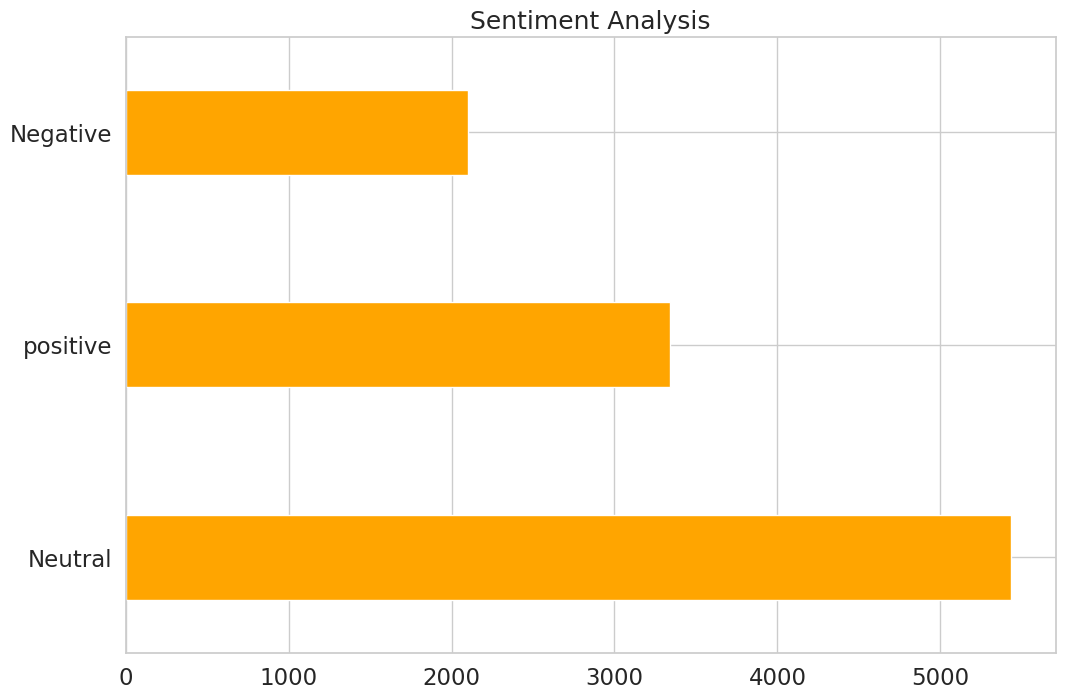

In [ ]:
textblob_df["textblob_sentiment"].value_counts().plot.barh(title = 'Sentiment Analysis',color='orange' , width=.4, figsize=(12,8),stacked = True)

In [ ]:
df_positive=textblob_df[textblob_df['textblob_sentiment']=='positive' ]

In [ ]:
textblob_df['text'] = pd.to_numeric(textblob_df['text'], errors='coerce')

In [ ]:
df_positive = textblob_df[textblob_df['text'] < 0]


In [ ]:
df_positive.head()

,text,textblob_sentiment,choose_one_gold


In [ ]:
df_negative=textblob_df[textblob_df['textblob_sentiment']=='Negative' ]

In [ ]:
df_negative

,text,textblob_sentiment,choose_one_gold
0,Just happened a terrible car crash,Negative,Relevant
8,#RockyFire Update => California Hwy. 20 closed...,Negative,Relevant
10,#flood #disaster Heavy rain causes flash flood...,Negative,Relevant
15,I'm afraid that the tornado is coming to our a...,Negative,Relevant\nCan't Decide
29,Fuck off!,Negative,Not Relevant
...,...,...,...
10852,# # # # MH370 Aircraft debris found on La Reun...,Negative,Relevant
10865,Storm in RI worse than last hurricane. My city...,Negative,Relevant
10867,#stormchase Violent Record Breaking EF-5 El Re...,Negative,Relevant
10868,Green Line derailment in Chicago httpt.coUtbXL...,Negative,Relevant


In [ ]:
df_neutral=textblob_df[textblob_df['textblob_sentiment']=='Neutral' ]

In [ ]:
df_neutral

,text,textblob_sentiment,choose_one_gold
1,Our Deeds are the Reason of this #earthquake M...,Neutral,Relevant
3,"there is a forest fire at spot pond, geese are...",Neutral,Relevant
5,All residents asked to 'shelter in place' are ...,Neutral,Relevant
6,"13,000 people receive #wildfires evacuation or...",Neutral,Relevant
7,Just got sent this photo from Ruby #Alaska as ...,Neutral,Relevant
...,...,...,...
10864,on the flip side I'm at Walmart and there is a...,Neutral,Relevant
10866,Suicide bomber kills 15 in Saudi security site...,Neutral,Relevant
10869,Two giant cranes holding a bridge collapse int...,Neutral,Relevant
10871,M1.94 [0104 UTC]5km S of Volcano Hawaii. httpt...,Neutral,Relevant


**Create a Word Cloud**

In [ ]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [ ]:
print(df_very_positive.head())  # Print the first few rows of the DataFrame
print(len(df_very_positive))

Empty DataFrame
Columns: [text, textblob_sentiment, choose_one_gold]
Index: []
0


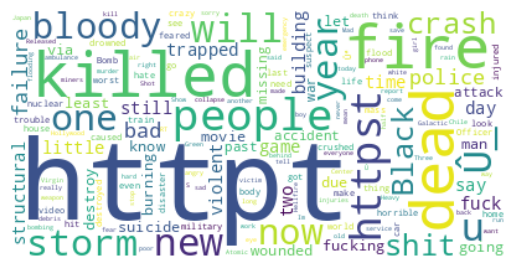

In [ ]:
#Creating the text variable
negative_tw =" ".join(t for t in df_negative.text)
# Creating word _ cloud with text as argument in . generate() rtpthod
word_cloud2 = WordCloud(collocations = False, background_color = 'white') .generate(negative_tw)
# Display the generated Word Cloud
plt. imshow(word_cloud2, interpolation='bilinear')
plt.axis('off')
plt.show()

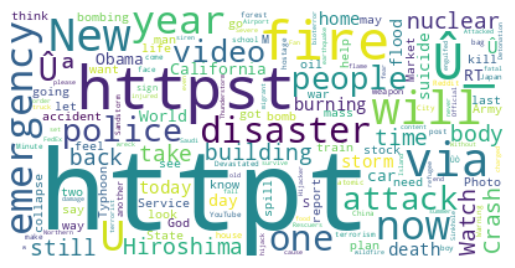

In [ ]:
#Creating the text variable
neutral_tw =" ".join(t for t in df_neutral.text)
# Creating word _ cloud with text as argument in . generate() rtpthod
word_cloud2 = WordCloud(collocations = False, background_color = 'white') .generate(neutral_tw)
# Display the generated Word Cloud
plt. imshow(word_cloud2, interpolation='bilinear')
plt.axis('off')
plt.show()